<a href="https://colab.research.google.com/github/AndrewPiasecki/CrimeDataSince2020/blob/main/Analysis-mandacontribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports, Data Info, and Data Cleaning


In [58]:
import seaborn as sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [59]:
url = "https://github.com/AndrewPiasecki/CrimeDataSince2020/blob/main/CrimeData.csv?raw=true"

In [60]:
Crime = pd.read_csv(url, index_col=0)

In [61]:
Crime.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
DR_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,
190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [62]:
Crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990293 entries, 190326475 to 240910892
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date Rptd       990293 non-null  object 
 1   DATE OCC        990293 non-null  object 
 2   TIME OCC        990293 non-null  int64  
 3   AREA            990293 non-null  int64  
 4   AREA NAME       990293 non-null  object 
 5   Rpt Dist No     990293 non-null  int64  
 6   Part 1-2        990293 non-null  int64  
 7   Crm Cd          990293 non-null  int64  
 8   Crm Cd Desc     990293 non-null  object 
 9   Mocodes         842641 non-null  object 
 10  Vict Age        990293 non-null  int64  
 11  Vict Sex        849515 non-null  object 
 12  Vict Descent    849504 non-null  object 
 13  Premis Cd       989970 non-null  float64
 14  Premis Desc     989399 non-null  object 
 15  Weapon Used Cd  326547 non-null  float64
 16  Weapon Desc     326547 non-null  object 
 17  Stat

In [63]:
Crime.isnull().sum()

,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0
Mocodes,147652


In [64]:
Crime.shape

(990293, 27)

In [65]:
Crime.describe()

,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,990293.000000,990293.000000,990293.000000,990293.000000,990293.000000,990293.000000,989970.000000,326547.000000,990282.000000,68957.000000,2311.000000,64.00000,990293.000000,990293.000000
mean,1339.256672,10.697314,1116.172073,1.402950,500.675146,29.011584,305.964166,363.873623,500.431720,958.159752,984.204673,991.21875,33.986463,-118.050015
std,651.351436,6.108960,611.015402,0.490491,205.914118,21.982132,219.200779,123.703129,205.713105,110.251655,51.485644,27.06985,1.730076,5.997837
min,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,900.000000,5.000000,587.000000,1.000000,331.000000,0.000000,101.000000,311.000000,331.000000,998.000000,998.000000,998.00000,34.014600,-118.430400
50%,1420.000000,11.000000,1141.000000,1.000000,442.000000,30.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058900,-118.322500
75%,1900.000000,16.000000,1617.000000,2.000000,626.000000,44.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.164900,-118.273900
max,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


In [66]:
# Replacing blank values with NA (I parsed through and saw these as the main culprits)

Crime["Status"].fillna("NA", inplace=True)
Crime["Mocodes"].fillna("NA", inplace=True)
Crime["Vict Sex"].fillna("NA", inplace=True)
Crime["Premis Desc"].fillna("NA", inplace=True)
Crime["Premis Cd"].fillna("NA", inplace=True)
Crime["Weapon Used Cd"].fillna("NA", inplace=True)
Crime["Weapon Desc"].fillna("NA", inplace=True)
Crime["Crm Cd 1"].fillna("NA", inplace=True)
Crime["Crm Cd 4"].fillna("NA", inplace=True)
Crime["Crm Cd 3"].fillna("NA", inplace=True)
Crime["Crm Cd 2"].fillna("NA", inplace=True)
Crime["Cross Street"].fillna("NA", inplace=True)
Crime["Vict Descent"].fillna("NA", inplace=True)




<ipython-input-66-04bb5d741786>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Crime["Status"].fillna("NA", inplace=True)
<ipython-input-66-04bb5d741786>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [67]:
# Converting all dates the datetime

Crime[["DATE OCC", "Date Rptd"]].apply(pd.to_datetime)

<ipython-input-67-00f5db8d78b4>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Crime[["DATE OCC", "Date Rptd"]].apply(pd.to_datetime)
<ipython-input-67-00f5db8d78b4>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Crime[["DATE OCC", "Date Rptd"]].apply(pd.to_datetime)


,DATE OCC,Date Rptd
DR_NO,,
190326475,2020-03-01,2020-03-01
200106753,2020-02-08,2020-02-09
200320258,2020-11-04,2020-11-11
200907217,2020-03-10,2023-05-10
220614831,2020-08-17,2022-08-18
...,...,...
240710284,2024-07-23,2024-07-24
240104953,2024-01-15,2024-01-15
240410786,2024-10-11,2024-10-14


In [68]:
Crime.isnull().sum()

,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0
Mocodes,0


# Visualizations and Discovery

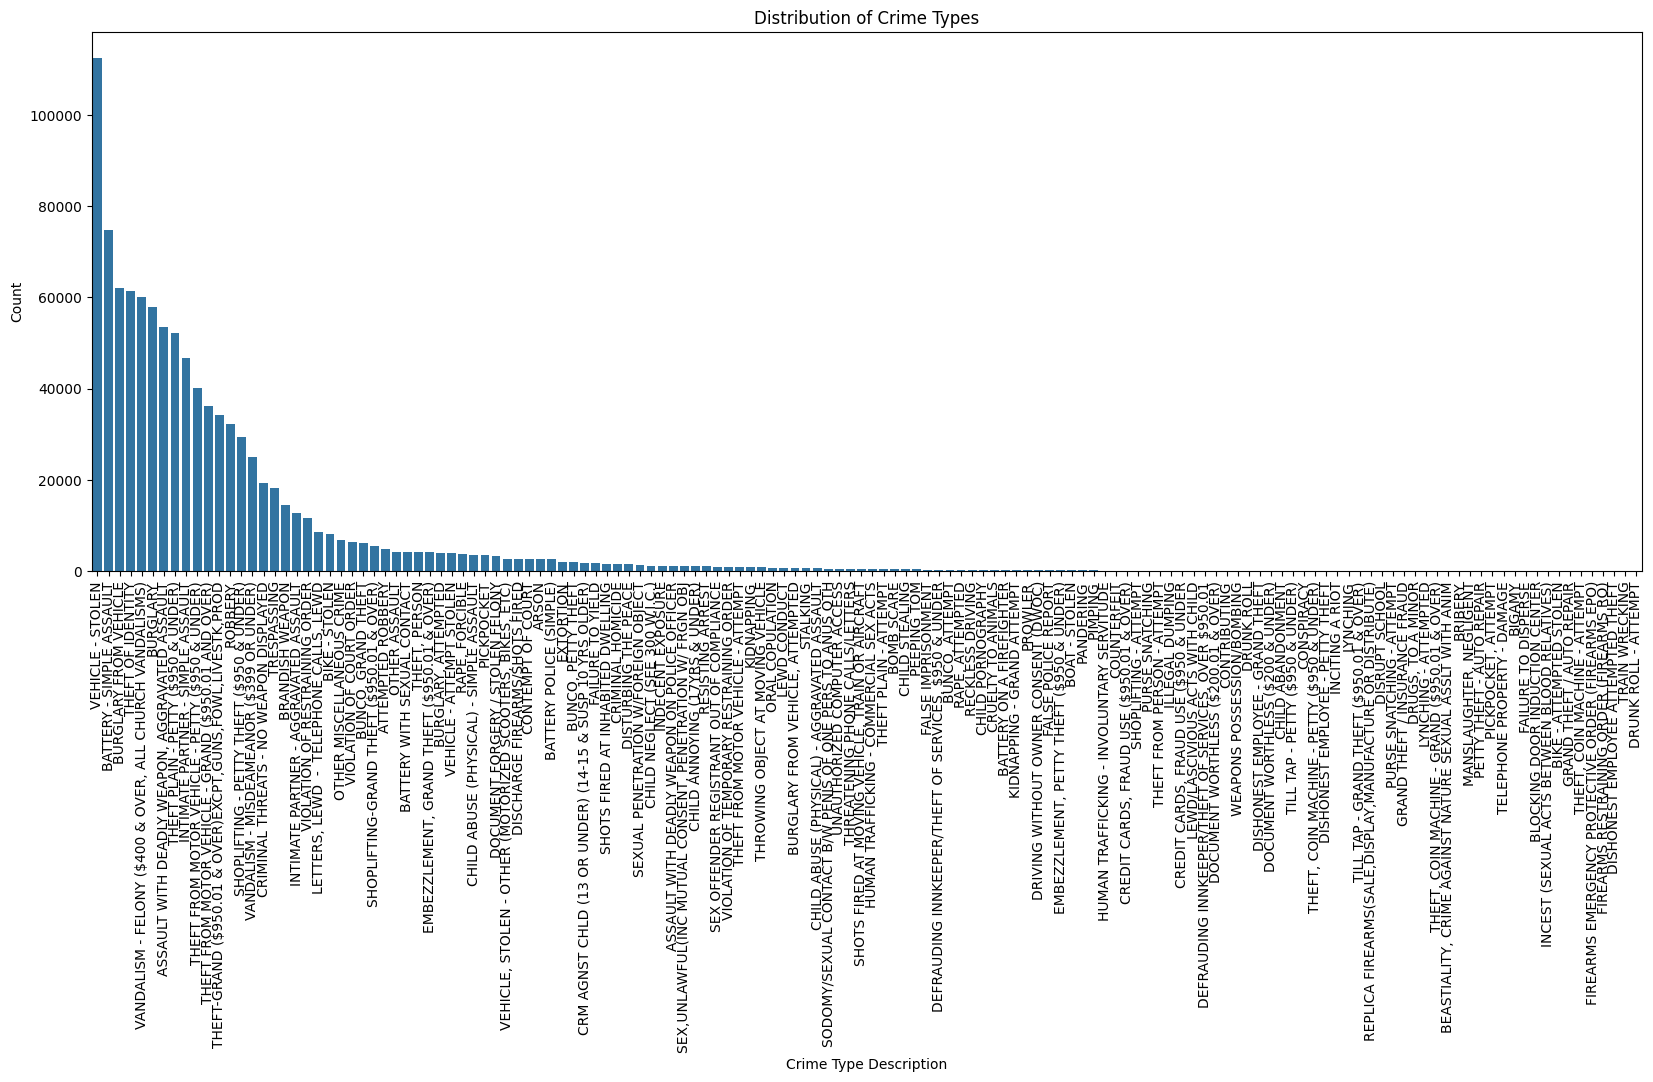

In [69]:
plt.figure(figsize=(20, 7))
sns.countplot(data = Crime, x = "Crm Cd Desc", order = Crime["Crm Cd Desc"].value_counts().index)
plt.xlabel("Crime Type Description")
plt.ylabel("Count")
plt.title("Distribution of Crime Types")
plt.xticks(rotation=90)
plt.show()

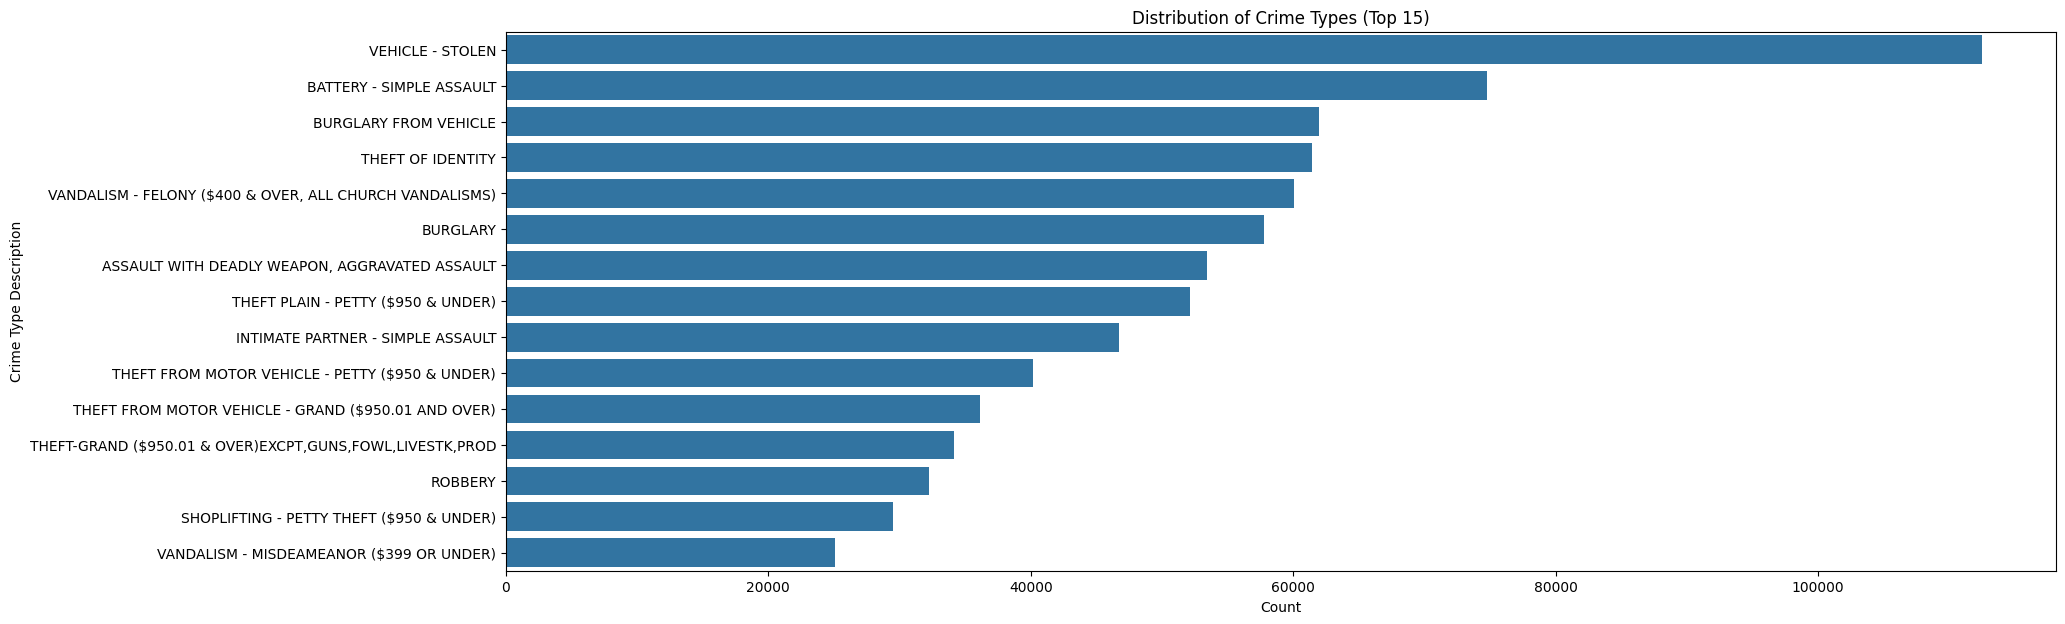

In [70]:
plt.figure(figsize=(20, 7))
sns.countplot(data=Crime, y='Crm Cd Desc', order=Crime['Crm Cd Desc'].value_counts().head(15).index)
plt.ylabel("Crime Type Description")
plt.xlabel("Count")
plt.title("Distribution of Crime Types (Top 15)")
plt.show()

<Figure size 1500x1000 with 0 Axes>

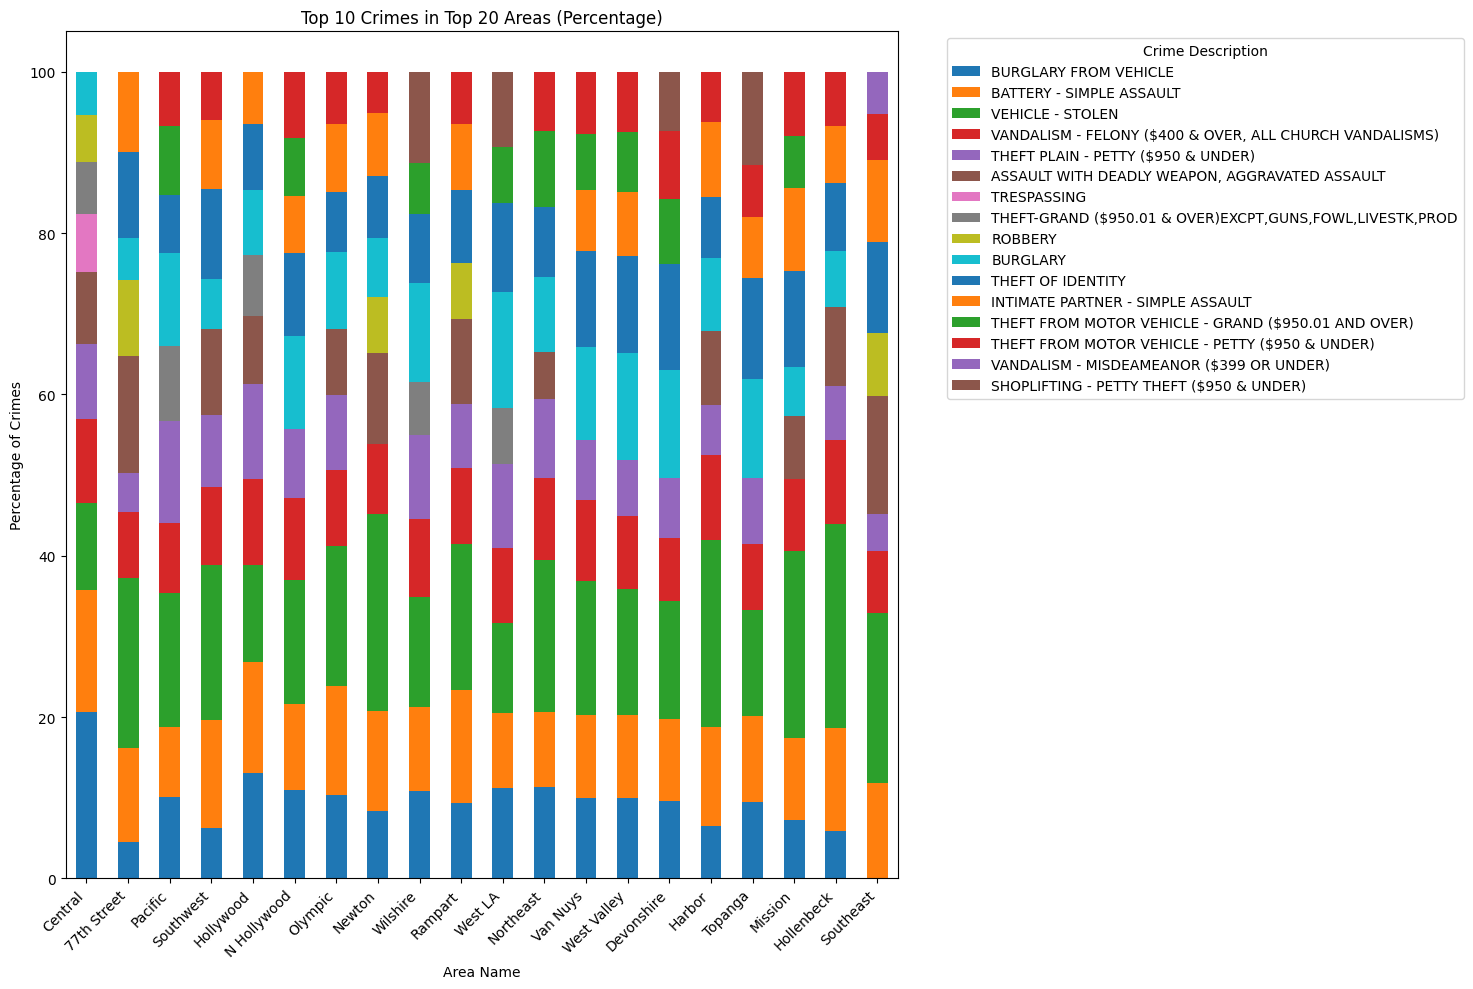

In [71]:

top_20_areas = Crime['AREA NAME'].value_counts().nlargest(20).index

# Create an empty dictionary
top_crimes_by_area = {}

# Iterate
for area in top_20_areas:

    area_crimes = Crime[Crime['AREA NAME'] == area]

    top_10_crimes = area_crimes['Crm Cd Desc'].value_counts().nlargest(10)

    top_crimes_by_area[area] = top_10_crimes


top_crimes_df = pd.DataFrame.from_dict(top_crimes_by_area, orient='index').fillna(0)

# Calculate the percentage
top_crimes_percentage_df = top_crimes_df.div(top_crimes_df.sum(axis=1), axis=0) * 100

# Plot
plt.figure(figsize=(15, 10))
top_crimes_percentage_df.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Top 10 Crimes in Top 20 Areas (Percentage)')
plt.xlabel('Area Name')
plt.ylabel('Percentage of Crimes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Crime Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 20 Most Crime Filled Areas

In [72]:
top_20_areas_df = Crime['AREA NAME'].value_counts().nlargest(20).reset_index()
top_20_areas_df.columns = ['Area Name', 'Crime Count']
top_20_areas_df

,Area Name,Crime Count
0,Central,68421
1,77th Street,61153
2,Pacific,58378
3,Southwest,56491
4,Hollywood,51726
5,N Hollywood,50370
6,Olympic,49416
7,Southeast,49414
8,Newton,48558
9,Wilshire,47472


## Count of each Crime that Happened in the 20 most crime filled area

In [73]:
top_20_crime_counts = {}
for area in top_20_areas:
  area_data = Crime[Crime['AREA NAME'] == area]
  crime_counts = area_data['Crm Cd Desc'].value_counts()
  top_20_crime_counts[area] = crime_counts


top_crimes_df = pd.DataFrame.from_dict(top_20_crime_counts, orient='index')
print("\nCrime Counts for Top 20 Areas:")
top_crimes_df


Crime Counts for Top 20 Areas:


,BURGLARY FROM VEHICLE,BATTERY - SIMPLE ASSAULT,VEHICLE - STOLEN,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",THEFT PLAIN - PETTY ($950 & UNDER),"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",TRESPASSING,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD",ROBBERY,BURGLARY,SHOPLIFTING - PETTY THEFT ($950 & UNDER),INTIMATE PARTNER - SIMPLE ASSAULT,THEFT OF IDENTITY,VANDALISM - MISDEAMEANOR ($399 OR UNDER),THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER),THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),BRANDISH WEAPON,CRIMINAL THREATS - NO WEAPON DISPLAYED,BIKE - STOLEN,PICKPOCKET,INTIMATE PARTNER - AGGRAVATED ASSAULT,"THEFT, PERSON",OTHER ASSAULT,OTHER MISCELLANEOUS CRIME,ATTEMPTED ROBBERY,"LETTERS, LEWD - TELEPHONE CALLS, LEWD",BATTERY WITH SEXUAL CONTACT,"RAPE, FORCIBLE",BATTERY POLICE (SIMPLE),VIOLATION OF RESTRAINING ORDER,ARSON,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)","BUNCO, GRAND THEFT","VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",SHOPLIFTING-GRAND THEFT ($950.01 & OVER),SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"BURGLARY, ATTEMPTED",VEHICLE - ATTEMPT STOLEN,VIOLATION OF COURT ORDER,CRIMINAL HOMICIDE,"BUNCO, PETTY THEFT",DISCHARGE FIREARMS/SHOTS FIRED,RESISTING ARREST,DOCUMENT FORGERY / STOLEN FELONY,FAILURE TO YIELD,SEXUAL PENETRATION W/FOREIGN OBJECT,BOMB SCARE,ORAL COPULATION,INDECENT EXPOSURE,...,CHILD PORNOGRAPHY,SHOPLIFTING - ATTEMPT,COUNTERFEIT,"DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01",HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE,HUMAN TRAFFICKING - COMMERCIAL SEX ACTS,LYNCHING - ATTEMPTED,PROWLER,PIMPING,DOCUMENT WORTHLESS ($200.01 & OVER),DOCUMENT WORTHLESS ($200 & UNDER),LYNCHING,FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO),FAILURE TO DISPERSE,PEEPING TOM,WEAPONS POSSESSION/BOMBING,"PICKPOCKET, ATTEMPT",BIKE - ATTEMPTED STOLEN,CONSPIRACY,"BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM",CHILD ABANDONMENT,TILL TAP - PETTY ($950 & UNDER),ILLEGAL DUMPING,PURSE SNATCHING - ATTEMPT,"THEFT, COIN MACHINE - ATTEMPT",DISHONEST EMPLOYEE - GRAND THEFT,BIGAMY,"REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)",BOAT - STOLEN,PANDERING,CONTRIBUTING,DISRUPT SCHOOL,"DRUGS, TO A MINOR","MANSLAUGHTER, NEGLIGENT",DISHONEST EMPLOYEE - PETTY THEFT,GRAND THEFT / AUTO REPAIR,INCITING A RIOT,"THEFT, COIN MACHINE - PETTY ($950 & UNDER)",GRAND THEFT / INSURANCE FRAUD,INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES),TILL TAP - GRAND THEFT ($950.01 & OVER),TELEPHONE PROPERTY - DAMAGE,BRIBERY,BLOCKING DOOR INDUCTION CENTER,"THEFT, COIN MACHINE - GRAND ($950.01 & OVER)",FIREARMS RESTRAINING ORDER (FIREARMS RO),PETTY THEFT - AUTO REPAIR,DISHONEST EMPLOYEE ATTEMPTED THEFT,DRUNK ROLL - ATTEMPT,TRAIN WRECKING
Central,9343,6800,4887,4714,4209,4044,3227,2926,2661,2401,2396,2223,1939,1638,1522,1256,1146,1126,847,758,719,636,587,477,457,418,393,356,328,282,231,219,202,196,183,162,157,146,145,141,102,100,97,94,93,81,77,76,73,72,...,6,6.0,5,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77th Street,1855,4706,8596,3337,1956,5912,265,1125,3804,2167,362,4060,4309,1726,1265,1824,1452,1591,39,18,1606,395,225,438,483,328,177,315,281,672,203,38,184,4,103,73,80,164,281,231,237,79,377,100,85,211,64,6,65,49,...,23,3.0,1,1.0,51.0,229.0,NaN,7.0,53.0,1.0,NaN,NaN,NaN,NaN,17,2.0,NaN,NaN,1.0,NaN,4.0,1.0,4.0,2.0,1.0,1.0,NaN,1.0,13.0,12.0,3.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pacific,3880,3313,6400,3342,4858,2019,1103,3571,1094,4423,1256,1545,2793,1295,3282,2576,465,814,1499,163,440,102,172,539,167,481,236,160,148,357,126,1385,409,737,226,5,35,287,355,273,35,72,73,102,251,39,99,64,29,46,...,10,4.0,9,7.0,3.0,5.0,2.0,25.0,6.0,7.0,5.0,NaN,NaN,NaN,24,3.0,1.0,1.0,NaN,NaN,1.0,2.0,NaN,NaN,1.0,3.0,2.0,NaN,6.0,2.0,1.0,NaN,2.0,NaN,3.0,NaN,19.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,N

Principal Component Summary

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Crime[["DATE OCC", "Date Rptd"]] = Crime[["DATE OCC", "Date Rptd"]].apply(pd.to_datetime)

numerical_features = Crime.select_dtypes(include=np.number).columns
numerical_data = Crime[numerical_features]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_data)

pc = PCA()
pc.fit(scaled_features)

pc_sum = pd.DataFrame({
    'Standard deviation': np.sqrt(pc.explained_variance_),
    'Proportion of varience': pc.explained_variance_ratio_,
    'Cumulative proportion': np.cumsum(pc.explained_variance_ratio_)

})

pcSummary = pc_sum.transpose()
pcSummary.columns = ['PC{}'.format(i) for i in range(1, len(pcSummary.columns) + 1)]

pcSummary.round(4)

<ipython-input-74-f775c1bd04fa>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Crime[["DATE OCC", "Date Rptd"]] = Crime[["DATE OCC", "Date Rptd"]].apply(pd.to_datetime)
<ipython-input-74-f775c1bd04fa>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Crime[["DATE OCC", "Date Rptd"]] = Crime[["DATE OCC", "Date Rptd"]].apply(pd.to_datetime)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Standard deviation,1.4276,1.4049,1.3087,1.0214,0.9831,0.5132,0.0386,0.0306
Proportion of varience,0.2548,0.2467,0.2141,0.1304,0.1208,0.0329,0.0002,0.0001
Cumulative proportion,0.2548,0.5015,0.7156,0.8460,0.9668,0.9997,0.9999,1.0000


In [75]:
pcComponents = pd.DataFrame(pc.components_.transpose(),
    columns=pcSummary.columns,
    index=numerical_features)

pcComponents.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
TIME OCC,0.0073,-0.0086,-0.0527,-0.6596,0.7477,0.0543,-0.0002,0.0001
AREA,0.4586,0.5367,-0.0327,-0.0171,-0.0156,-0.0024,0.1082,0.6988
Rpt Dist No,0.4585,0.5368,-0.0328,-0.0171,-0.0155,-0.0026,-0.1178,-0.6972
Part 1-2,-0.0858,0.1197,0.6944,0.0138,0.0123,0.7042,-0.0001,-0.0001
Crm Cd,-0.1001,0.1106,0.6612,-0.2590,-0.1306,-0.6756,-0.0001,0.0000
Vict Age,0.0070,0.0455,0.1820,0.7049,0.6505,-0.2115,-0.0006,0.0002
LAT,0.5332,-0.4407,0.1460,-0.0085,-0.0071,-0.0037,0.6981,-0.1131
LON,-0.5270,0.4482,-0.1462,0.0087,0.0077,0.0035,0.6979,-0.1129


Principal Component Analysis

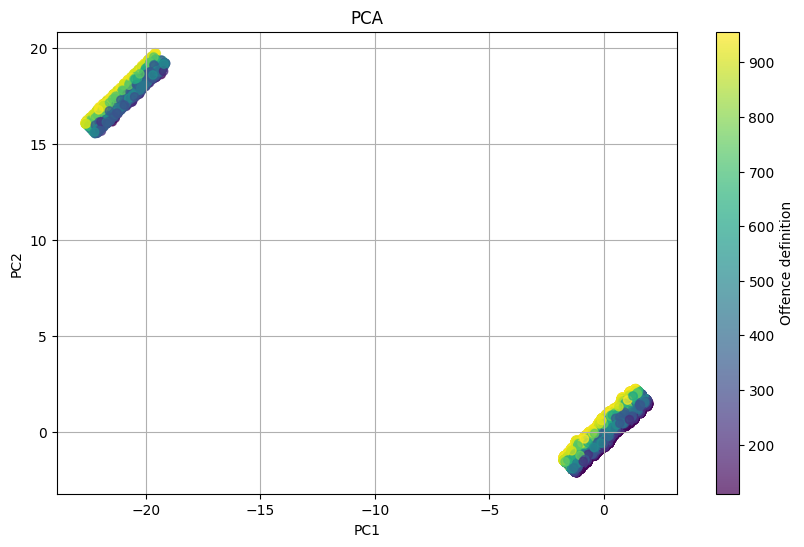

In [76]:
target = Crime['Crm Cd']

pca = PCA(n_components=2)
pca_res = pca.fit_transform(scaled_features)

plt.figure(figsize=(10,6))
plt.scatter(pca_res[:,0], pca_res[:,1], c=target, cmap='viridis', alpha=0.7)

plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.colorbar(label='Offence definition')

plt.grid(True)
plt.show()

T-Distributed Stochastic Neighbor Embedding (tSNE)

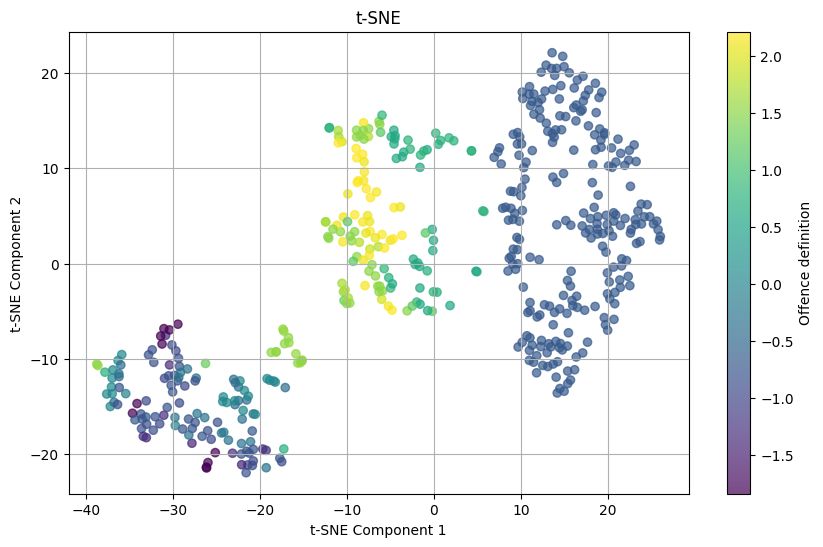

In [77]:
from sklearn.manifold import TSNE

scaled_features_df = pd.DataFrame(scaled_features, columns=numerical_features)
scaled_features_df = scaled_features_df[0:500]

target = scaled_features_df['Crm Cd']

tsne = TSNE(n_components=2, random_state=42)
tsne_res = tsne.fit_transform(scaled_features_df)

plt.figure(figsize=(10,6))

plt.scatter(tsne_res[:,0], tsne_res[:,1], c=target, cmap='viridis', alpha=0.7)

plt.title('t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.colorbar(label='Offence definition')
plt.grid(True)
plt.show()

Density-Based Spatial Clustering of Applications (DBSCAN)

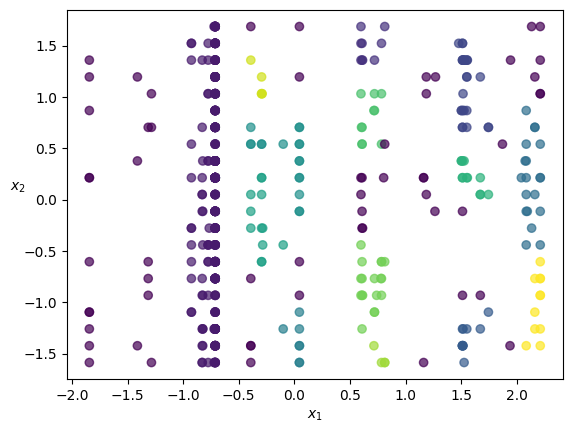

In [78]:
from sklearn.cluster import DBSCAN

scaled_features_df = pd.DataFrame(scaled_features, columns=numerical_features)
scaled_features_df = scaled_features_df[0:500]
X = scaled_features_df[['Crm Cd', 'AREA']]

dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

plt.scatter(X['Crm Cd'], X['AREA'], c=dbscan.labels_, cmap='viridis', alpha=0.7)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

K-Means Clustering

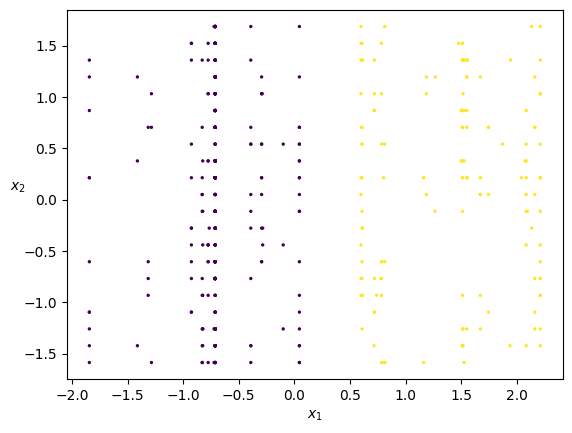

In [79]:
from sklearn.cluster import KMeans

k = KMeans(n_clusters=2, random_state=42)
k.fit(X)

plt.scatter(X['Crm Cd'], X['AREA'], c=k.labels_, s=2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.show()

Davies Boulding Score (DBI)

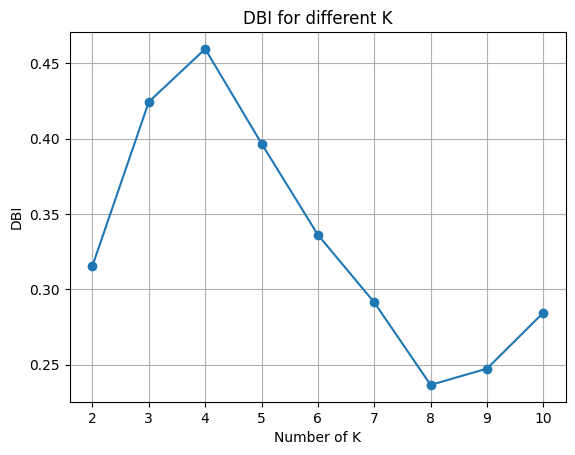

In [80]:
from sklearn.metrics import davies_bouldin_score

X = numerical_data[['Crm Cd', 'AREA']].values
X = X[:500]
# Generate random labels for demonstration (replace with your actual labels if available)
y = np.random.randint(0, 4, size=500)

k_val = []
dbi_val = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_

    dbi = davies_bouldin_score(X,labels)

    k_val.append(k)
    dbi_val.append(dbi)

import matplotlib.pyplot as plt
plt.plot(k_val, dbi_val, marker='o')
plt.title('DBI for different K')
plt.xlabel('Number of K')
plt.ylabel('DBI')
plt.grid(True)
plt.show()

Hierachal Clustering : Dendrograms and HeatMap

<ipython-input-81-7b56e8beef02>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data.dropna(inplace = True)


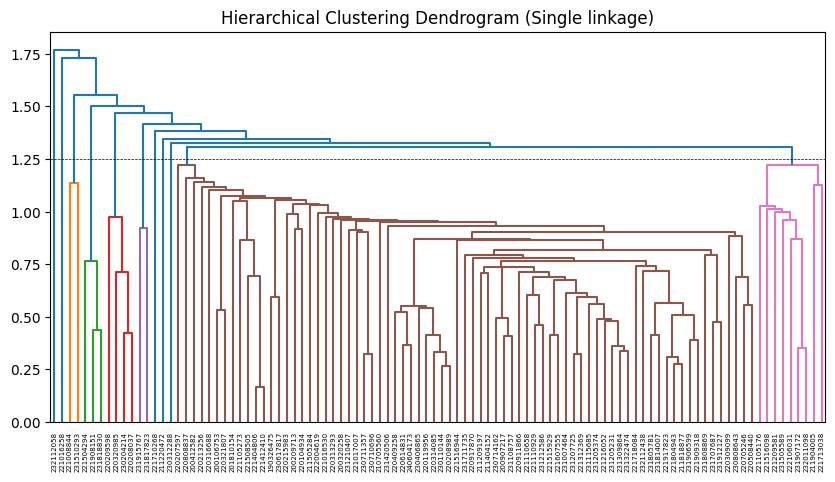

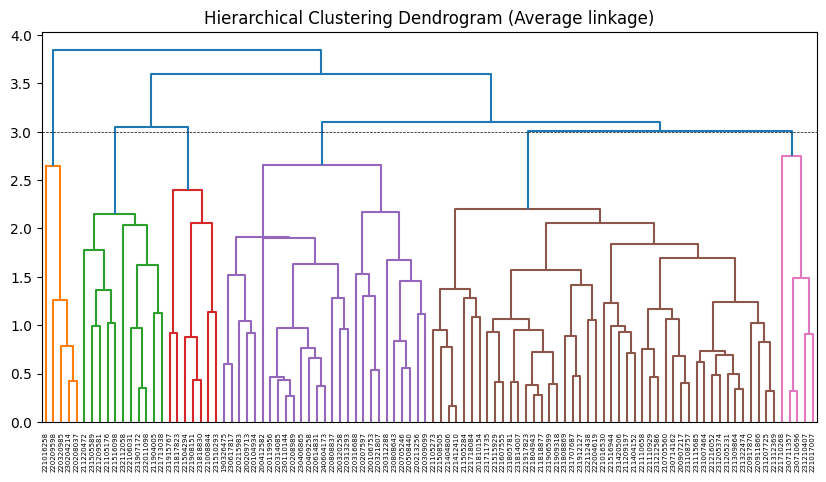

<function matplotlib.pyplot.show(close=None, block=None)>

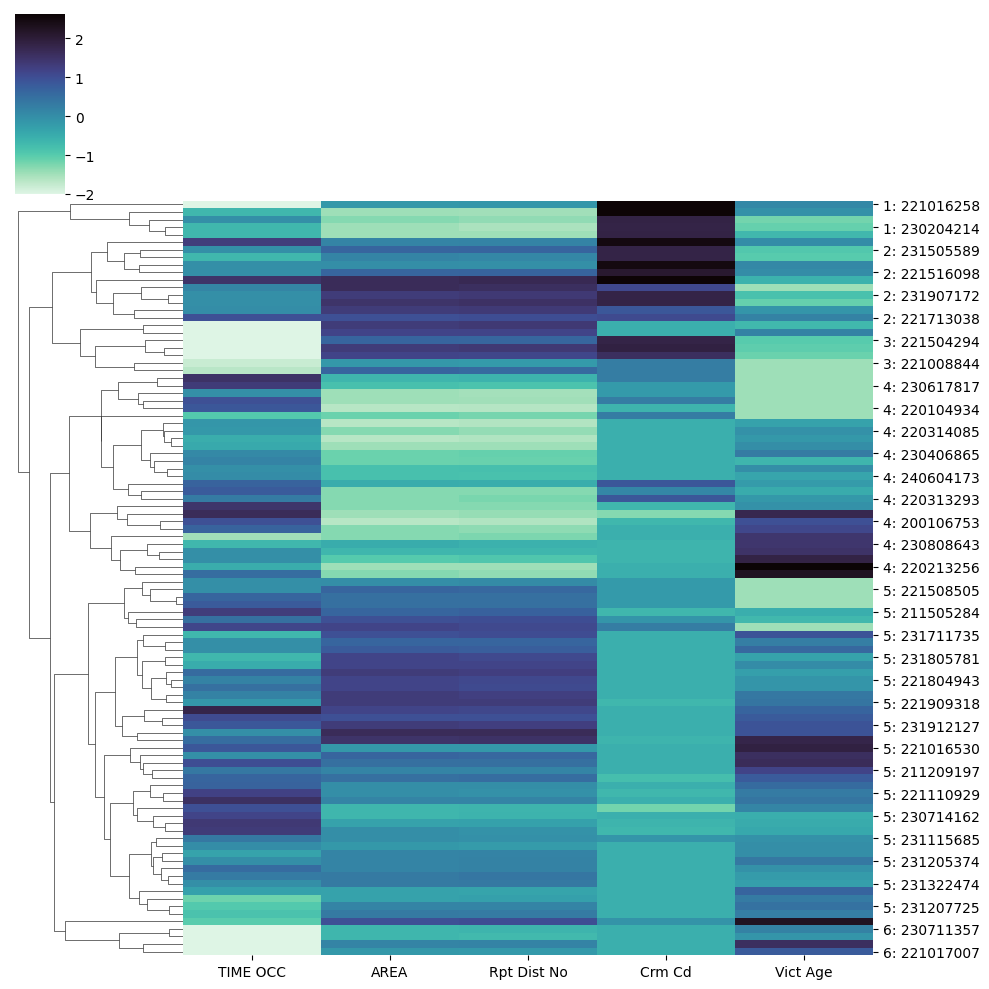

In [81]:
from pathlib import Path
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from pandas.plotting import parallel_coordinates

numerical_data.dropna(inplace = True)

crimes = numerical_data[['TIME OCC', 'AREA', 'Rpt Dist No', 'Crm Cd', 'Vict Age']]
crimes = crimes[0:100]
crimes_norm = (crimes - crimes.mean())/crimes.std()

d_norm = pairwise.pairwise_distances(crimes_norm, metric = 'euclidean')
z = linkage(crimes_norm, method = 'single')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
dendrogram(z, labels=crimes_norm.index, color_threshold=1.25)
plt.axhline(y=1.25, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

l = linkage(crimes_norm, method='average')
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
dendrogram(l, labels = crimes_norm.index, color_threshold=3)
plt.axhline(y=3, color = 'black', linewidth=0.5, linestyle='dashed')
plt.show()

mem = fcluster(linkage(crimes_norm, 'average'), 6, criterion='maxclust')
mem = pd.Series(mem, index=crimes_norm.index)


crimes_norm.index = ['{}: {}'.format(cluster, AREA) for cluster, AREA in zip(mem, crimes_norm.index)]
sns.clustermap(crimes_norm, method = 'average', col_cluster=False, cmap = "mako_r")
plt.show

### Classifications

crime type

In [82]:
#Classifying Crime Type

In [83]:
crime_sample = Crime.sample(frac = .10)

In [84]:
crime_sample

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
DR_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,
231514983,2023-09-17,2023-09-15,2100,15,N Hollywood,1569,1,520,VEHICLE - ATTEMPT STOLEN,0321,71,F,B,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NA,NA,IC,Invest Cont,520.0,NA,NA,NA,10300 RIVERSIDE DR,NA,34.1522,-118.3549
221917480,2022-12-02,2022-11-28,1100,19,Mission,1998,1,330,BURGLARY FROM VEHICLE,1607 0344,0,X,X,108.0,PARKING LOT,NA,NA,IC,Invest Cont,330.0,NA,NA,NA,7800 VAN NUYS BL,NA,34.2153,-118.4409
210509799,2021-06-01,2021-06-01,347,5,Harbor,531,2,354,THEFT OF IDENTITY,0930,35,F,O,710.0,OTHER PREMISE,NA,NA,IC,Invest Cont,354.0,NA,NA,NA,26000 FRAMPTON AV,NA,33.7866,-118.3044
221414903,2022-08-08,2022-08-08,2330,14,Pacific,1483,2,624,BATTERY - SIMPLE ASSAULT,0444 0429,35,F,A,228.0,BOWLING ALLEY*,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,624.0,NA,NA,NA,8700 LINCOLN BL,NA,33.9568,-118.4290
200118101,2020-09-17,2020-09-17,430,1,Central,145,1,310,BURGLARY,1822 0319 1414 0329 0344 1609 0375,43,M,W,210.0,RESTAURANT/FAST FOOD,NA,NA,IC,Invest Cont,310.0,NA,NA,NA,400 S MAIN ST,NA,34.0478,-118.2475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221718383,2022-12-30,2022-12-29,2100,17,Devonshire,1787,1,510,VEHICLE - STOLEN,NA,0,NA,NA,707.0,GARAGE/CARPORT,NA,NA,IC,Invest Cont,510.0,NA,NA,NA,17800 HALSTED ST,NA,34.2450,-118.5216
221911817,2022-07-09,2022-07-09,30,19,Mission,1905,2,354,THEFT OF IDENTITY,0922 1822,63,F,H,501.0,SINGLE FAMILY DWELLING,NA,NA,IC,Invest Cont,354.0,NA,NA,NA,13300 WHEELER AV,NA,34.3152,-118.4315
231217281,2023-08-04,2023-07-30,1130,12,77th Street,1233,2,354,THEFT OF IDENTITY,0100 0928,29,F,H,501.0,SINGLE FAMILY DWELLING,NA,NA,IC,Invest Cont,354.0,NA,NA,NA,2100 W SLAUSON AV,NA,33.9891,-118.3159


In [85]:
crime_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99029 entries, 231514983 to 241105267
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date Rptd       99029 non-null  datetime64[ns]
 1   DATE OCC        99029 non-null  datetime64[ns]
 2   TIME OCC        99029 non-null  int64         
 3   AREA            99029 non-null  int64         
 4   AREA NAME       99029 non-null  object        
 5   Rpt Dist No     99029 non-null  int64         
 6   Part 1-2        99029 non-null  int64         
 7   Crm Cd          99029 non-null  int64         
 8   Crm Cd Desc     99029 non-null  object        
 9   Mocodes         99029 non-null  object        
 10  Vict Age        99029 non-null  int64         
 11  Vict Sex        99029 non-null  object        
 12  Vict Descent    99029 non-null  object        
 13  Premis Cd       99029 non-null  object        
 14  Premis Desc     99029 non-null  object        


In [86]:
print(crime_sample['Crm Cd Desc'].value_counts())


Crm Cd Desc
VEHICLE - STOLEN                                           11147
BATTERY - SIMPLE ASSAULT                                    7585
THEFT OF IDENTITY                                           6248
BURGLARY FROM VEHICLE                                       6215
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     5956
                                                           ...  
TILL TAP - PETTY ($950 & UNDER)                                1
TELEPHONE PROPERTY - DAMAGE                                    1
FAILURE TO DISPERSE                                            1
DRUNK ROLL                                                     1
DISHONEST EMPLOYEE ATTEMPTED THEFT                             1
Name: count, Length: 129, dtype: int64


In [87]:
# dropping anything that accounts for less than 1000 instances of sample data

crime_counts = crime_sample['Crm Cd Desc'].value_counts()
crimes_to_drop = crime_counts[crime_counts <= 1000].index
crimes_to_drop
crime_sample = crime_sample[~crime_sample['Crm Cd Desc'].isin(crimes_to_drop)]
print(crime_sample['Crm Cd Desc'].value_counts())

Crm Cd Desc
VEHICLE - STOLEN                                            11147
BATTERY - SIMPLE ASSAULT                                     7585
THEFT OF IDENTITY                                            6248
BURGLARY FROM VEHICLE                                        6215
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      5956
BURGLARY                                                     5694
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               5305
THEFT PLAIN - PETTY ($950 & UNDER)                           5209
INTIMATE PARTNER - SIMPLE ASSAULT                            4735
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              4098
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)          3664
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     3470
ROBBERY                                                      3181
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                     2956
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                     249

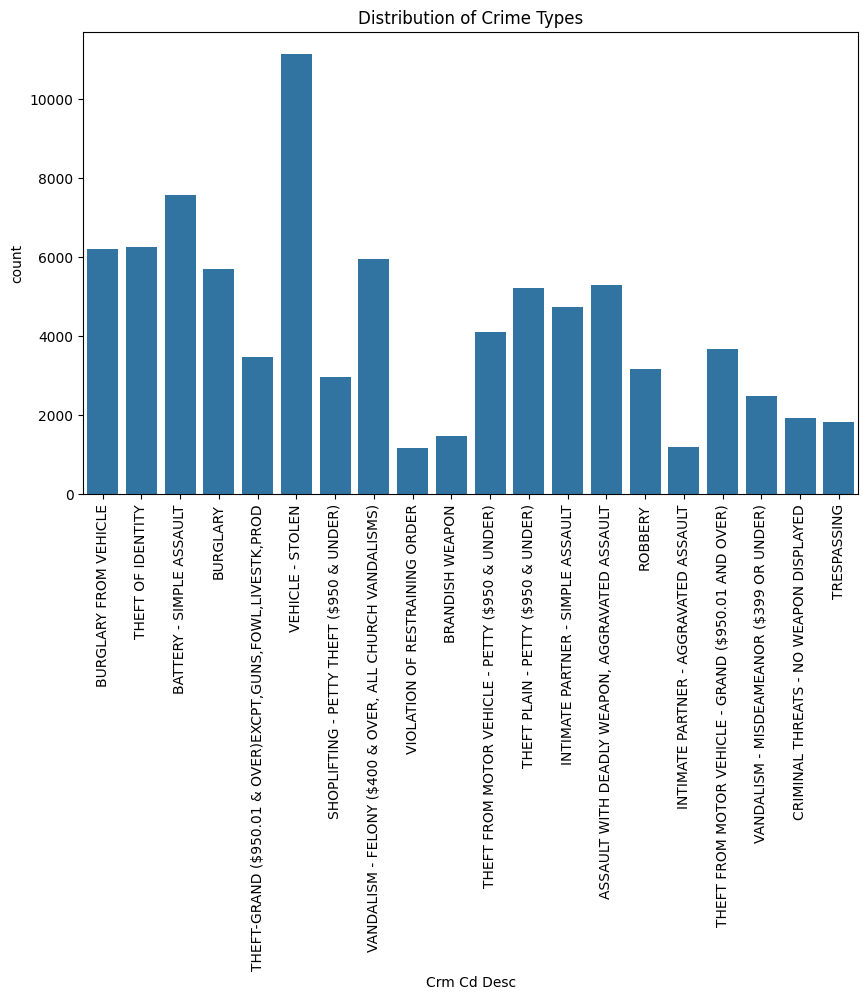

In [88]:
plt.figure(figsize=(10,6))
sns.countplot(data=crime_sample, x='Crm Cd Desc')
plt.title('Distribution of Crime Types')
plt.xticks(rotation=90)
plt.show()

In [89]:
crime_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85532 entries, 221917480 to 230506368
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date Rptd       85532 non-null  datetime64[ns]
 1   DATE OCC        85532 non-null  datetime64[ns]
 2   TIME OCC        85532 non-null  int64         
 3   AREA            85532 non-null  int64         
 4   AREA NAME       85532 non-null  object        
 5   Rpt Dist No     85532 non-null  int64         
 6   Part 1-2        85532 non-null  int64         
 7   Crm Cd          85532 non-null  int64         
 8   Crm Cd Desc     85532 non-null  object        
 9   Mocodes         85532 non-null  object        
 10  Vict Age        85532 non-null  int64         
 11  Vict Sex        85532 non-null  object        
 12  Vict Descent    85532 non-null  object        
 13  Premis Cd       85532 non-null  object        
 14  Premis Desc     85532 non-null  object        


into classifying

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd


X = crime_sample[['Vict Age', 'Vict Sex', 'LAT', 'LON', 'TIME OCC']]
y = crime_sample['Crm Cd Desc']


numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())


categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

# Label encoding for 'Vict Sex' ( F -> 0, M -> 1)
le = LabelEncoder()
X['Vict Sex'] = le.fit_transform(X['Vict Sex'])

y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(68425, 5) (17107, 5)


<ipython-input-92-8a8bcf1cd513>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())
<ipython-input-92-8a8bcf1cd513>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].fillna(X[col].mode()[0])
<ipython-input-92-8a8bcf1cd513>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

Random Forrest

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_dist = {
    'n_estimators': [100],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=3, cv=2, n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)

best_rf = random_search_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.22      0.20      1075
           1       0.17      0.22      0.19      1560
           2       0.02      0.01      0.01       301
           3       0.24      0.25      0.25      1183
           4       0.21      0.25      0.23      1244
           5       0.04      0.02      0.03       396
           6       0.07      0.03      0.04       252
           7       0.16      0.22      0.19       876
           8       0.13      0.09      0.11       648
           9       0.53      0.62      0.57       613
          10       0.12      0.09      0.10       733
          11       0.14      0.05      0.07       809
          12       0.22      0.30      0.25      1246
          13       0.12      0.11      0.12      1045
          14       0.15      0.10      0.12       682
          15       0.48      0.37      0.42       353
          16       0.11      0.10      0.11 

In [94]:
#trying oug the random forrest again!

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix


rf = RandomForestClassifier(random_state=42, class_weight='balanced')

param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=5, cv=3, n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)

best_rf = random_search_rf.best_estimator_

y_pred_rf = best_rf.predict(X_test)


print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.27      0.22      1075
           1       0.20      0.17      0.18      1560
           2       0.04      0.03      0.03       301
           3       0.27      0.25      0.26      1183
           4       0.23      0.27      0.25      1244
           5       0.07      0.04      0.05       396
           6       0.08      0.06      0.07       252
           7       0.17      0.30      0.22       876
           8       0.14      0.10      0.11       648
           9       0.51      0.67      0.58       613
          10       0.14      0.14      0.14       733
          11       0.22      0.05      0.08       809
          12       0.22      0.33      0.27      1246
          13       0.13      0.13      0.13      1045
          14       0.15      0.11      0.13       682
          15       0.48      0.37      0.42       353
          16       0.14      0.08      0.10 

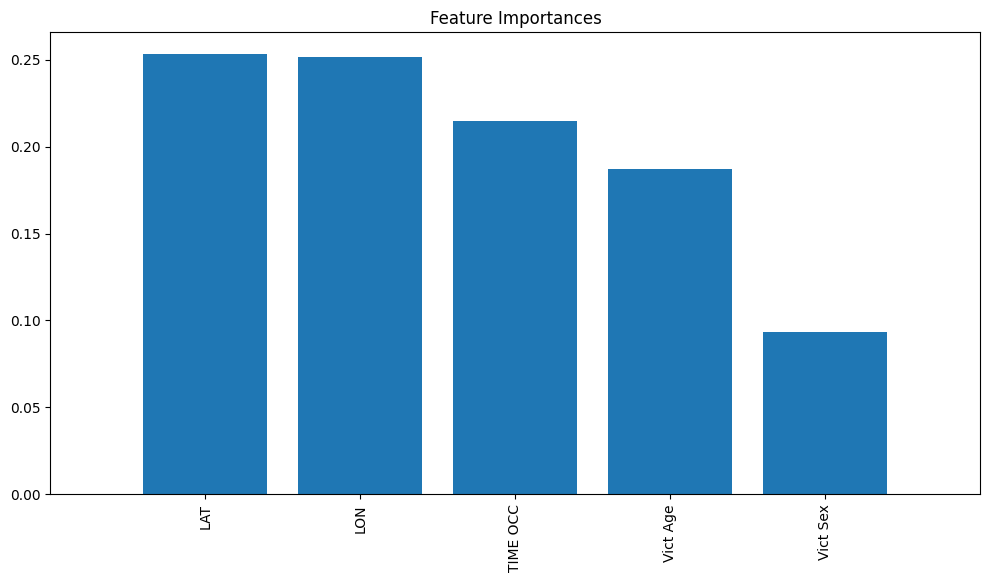

In [96]:
import numpy as np

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


logistic regression

In [97]:

from sklearn.linear_model import LogisticRegression

# Initialize LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1075
           1       0.14      0.34      0.20      1560
           2       0.00      0.00      0.00       301
           3       0.08      0.15      0.11      1183
           4       0.19      0.10      0.13      1244
           5       0.00      0.00      0.00       396
           6       0.00      0.00      0.00       252
           7       0.14      0.33      0.20       876
           8       0.00      0.00      0.00       648
           9       0.12      0.00      0.00       613
          10       0.00      0.00      0.00       733
          11       0.00      0.00      0.00       809
          12       0.18      0.32      0.23      1246
          13       0.00      0.00      0.00      1045
          14       0.00      0.00      0.00       682
          15       0.00      0.00      0.00       353
          16       0.06      0.07     

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Gradient booster

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.27      0.24      1075
           1       0.19      0.31      0.24      1560
           2       0.00      0.00      0.00       301
           3       0.28      0.28      0.28      1183
           4       0.22      0.37      0.28      1244
           5       0.00      0.00      0.00       396
           6       0.00      0.00      0.00       252
           7       0.18      0.37      0.24       876
           8       0.19      0.03      0.05       648
           9       0.40      0.68      0.50       613
          10       0.17      0.05      0.08       733
          11       0.00      0.00      0.00       809
          12       0.23      0.49      0.32      1246
          13       0.12      0.09      0.10      1045
          14       0.34      0.06      0.10       682
          15       0.55      0.29      0.38       353
          16       0.19      0.05      0

K Neighbors

In [100]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.26      0.15      1075
           1       0.14      0.26      0.19      1560
           2       0.04      0.04      0.04       301
           3       0.17      0.22      0.19      1183
           4       0.14      0.17      0.15      1244
           5       0.02      0.01      0.01       396
           6       0.06      0.03      0.04       252
           7       0.12      0.12      0.12       876
           8       0.11      0.06      0.07       648
           9       0.36      0.38      0.37       613
          10       0.11      0.05      0.07       733
          11       0.21      0.07      0.10       809
          12       0.23      0.20      0.22      1246
          13       0.09      0.04      0.06      1045
          14       0.08      0.03      0.04       682
          15       0.19      0.11      0.14       353
          16       0.11      0.06      0.08      1169


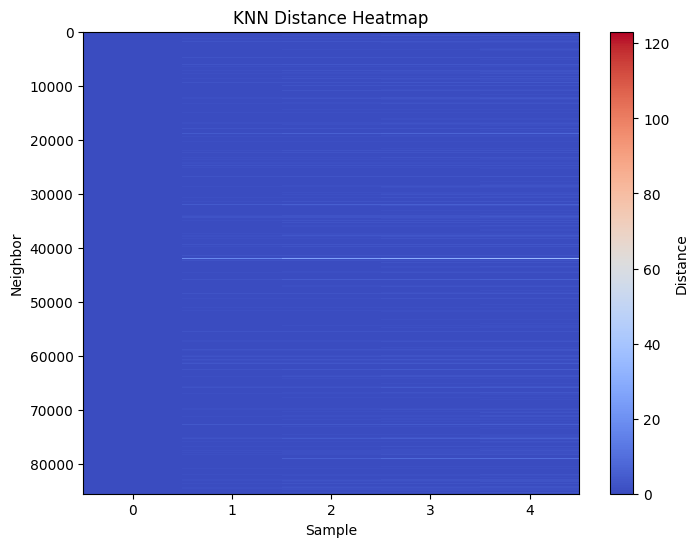

In [101]:
from sklearn.neighbors import KNeighborsRegressor

#predict distances
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X, y)

distances, indices = knn.kneighbors(X)

plt.figure(figsize=(8, 6))
plt.imshow(distances, cmap='coolwarm', aspect='auto', interpolation='nearest')
plt.colorbar(label='Distance')
plt.title('KNN Distance Heatmap')
plt.xlabel('Sample')
plt.ylabel('Neighbor')
plt.show()


linear SVM

In [102]:
from sklearn.svm import LinearSVC as lins

# Initialize lins
svm = lins(random_state=42)

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1075
           1       0.13      0.53      0.21      1560
           2       0.00      0.00      0.00       301
           3       0.06      0.01      0.02      1183
           4       0.00      0.00      0.00      1244
           5       0.00      0.00      0.00       396
           6       0.00      0.00      0.00       252
           7       0.14      0.34      0.20       876
           8       0.00      0.00      0.00       648
           9       0.35      0.05      0.08       613
          10       0.00      0.00      0.00       733
          11       0.00      0.00      0.00       809
          12       0.15      0.42      0.22      1246
          13       0.00      0.00      0.00      1045
          14       0.00      0.00      0.00       682
          15       0.00      0.00      0.00       353
          16       0.06      0.00      0.00      1169


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


vis

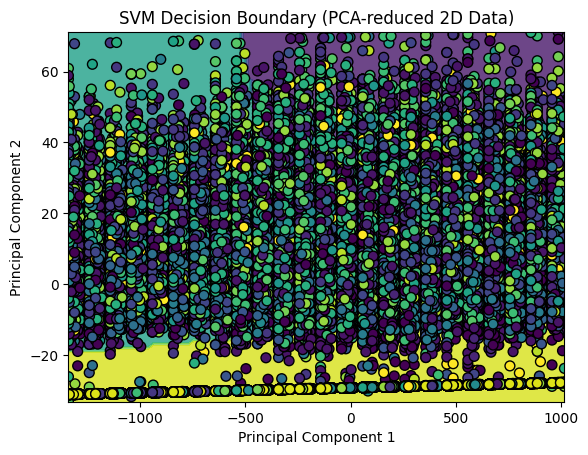

In [103]:
from sklearn.decomposition import PCA

# Applying PCA to reduce to 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

svm = lins(random_state=42)
svm.fit(X_reduced, y)

xx, yy = np.meshgrid(np.linspace(X_reduced[:, 0].min(), X_reduced[:, 0].max(), 100),
                     np.linspace(X_reduced[:, 1].min(), X_reduced[:, 1].max(), 100))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolors='k', marker='o', s=50)
plt.title('SVM Decision Boundary (PCA-reduced 2D Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


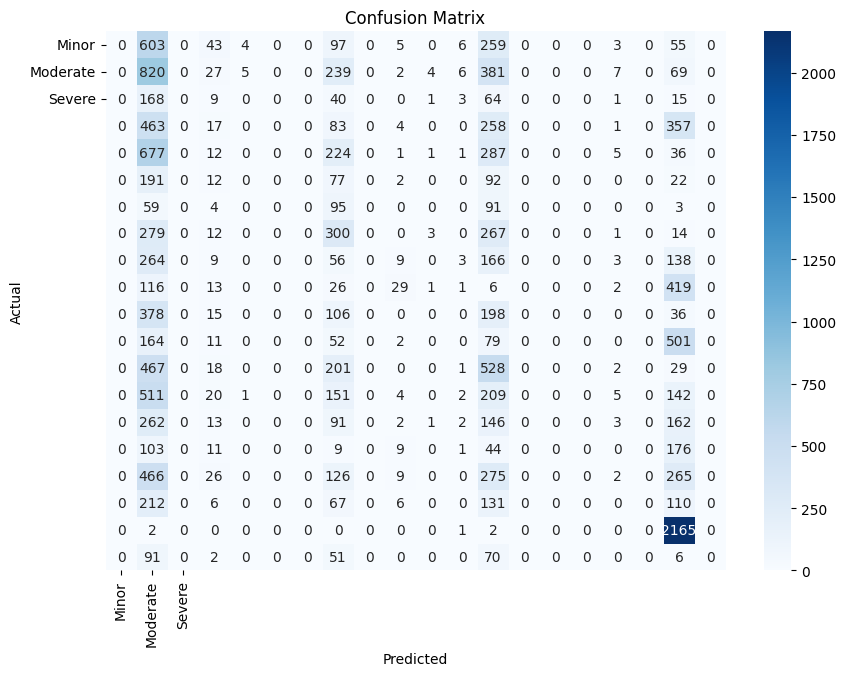

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Minor', 'Moderate', 'Severe'], yticklabels=['Minor', 'Moderate', 'Severe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Crime Severity Classifier

In [105]:

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

def map_severity(crime_type):
    severe_crimes = ['ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'ROBBERY',
                       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)']
    moderate_crimes = ['BURGLARY', 'THEFT PLAIN - PETTY ($950 & UNDER)', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 'CRIMINAL THREATS - NO WEAPON DISPLAYED']
    minor_crimes = ['VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 'THEFT OF IDENTITY', 'BATTERY - SIMPLE ASSAULT',
                    'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 'TRESPASSING', 'BRANDISH WEAPON', 'INTIMATE PARTNER - SIMPLE ASSAULT',
                    'VIOLATION OF RESTRAINING ORDER']

    if crime_type in severe_crimes:
        return 3  # Severe
    elif crime_type in moderate_crimes:
        return 2  # Moderate
    elif crime_type in minor_crimes:
        return 1  # Minor
    else:
        return 0  # Unknown


crime_sample['severity'] = crime_sample['Crm Cd Desc'].apply(map_severity)

X = crime_sample[['Vict Age', 'Vict Sex', 'LAT', 'LON', 'TIME OCC']]
y = crime_sample['severity']

numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

le = LabelEncoder()
X['Vict Sex'] = le.fit_transform(X['Vict Sex'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = lins(random_state=42)

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM Classification Report for Crime Severity:")
print(classification_report(y_test, y_pred_svm))

print("Confusion Matrix for Crime Severity:")
print(confusion_matrix(y_test, y_pred_svm))


<ipython-input-105-468038257086>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_sample['severity'] = crime_sample['Crm Cd Desc'].apply(map_severity)
<ipython-input-105-468038257086>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())
<ipython-input-105-468038257086>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

SVM Classification Report for Crime Severity:
              precision    recall  f1-score   support

           0       0.52      0.60      0.56      5157
           1       0.46      0.82      0.59      6257
           2       0.11      0.00      0.00      3237
           3       0.04      0.00      0.00      2456

    accuracy                           0.48     17107
   macro avg       0.28      0.36      0.29     17107
weighted avg       0.35      0.48      0.39     17107

Confusion Matrix for Crime Severity:
[[3109 2045    1    2]
 [1087 5144    6   20]
 [1206 2029    1    1]
 [ 574 1880    1    1]]


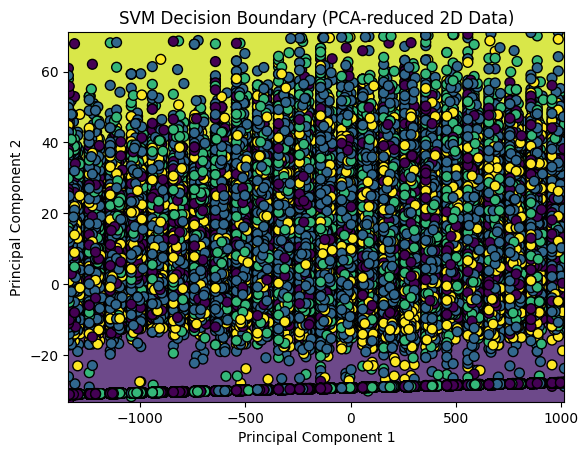

In [106]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

svm = lins(random_state=42)
svm.fit(X_reduced, y)

xx, yy = np.meshgrid(np.linspace(X_reduced[:, 0].min(), X_reduced[:, 0].max(), 100),
                     np.linspace(X_reduced[:, 1].min(), X_reduced[:, 1].max(), 100))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolors='k', marker='o', s=50)
plt.title('SVM Decision Boundary (PCA-reduced 2D Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


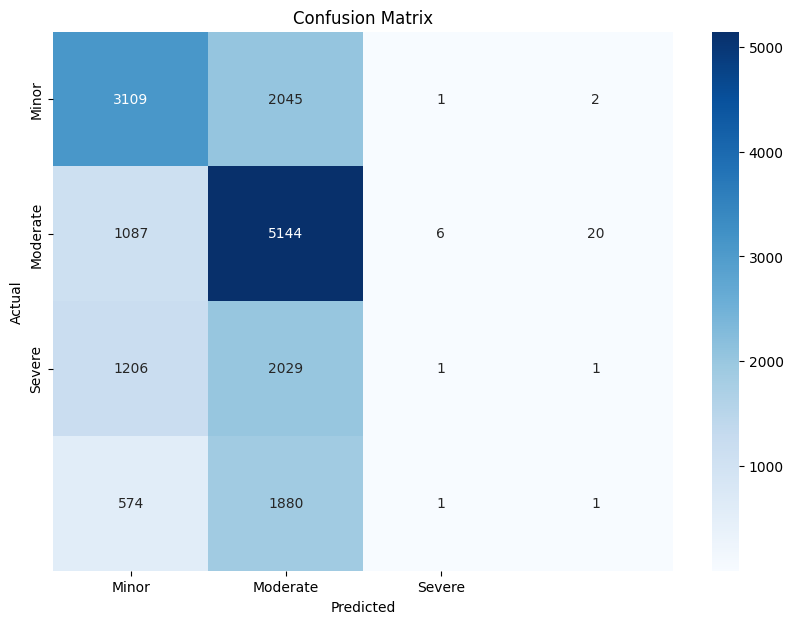

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Minor', 'Moderate', 'Severe'], yticklabels=['Minor', 'Moderate', 'Severe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
